In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
from nilearn import image, plotting

/home/titir/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [4]:
#rootdir = "/home/sks/Documents/FMRI_Titir_Soumalya/25_Nov/ABIDE2_DATA"

In [72]:
rootdir = "/media/titir/Linux/Dataset_ABIDEII"

In [73]:
X_features = []

In [86]:
sites = ["BNI"]
fnames = []
for site in sites:
    fnames.append("ABIDEII-" + site + "_1.csv")

In [87]:
fnames

['ABIDEII-BNI_1.csv']

In [131]:
i = 0
fmri_filenames  = []
for site in sites:
    for subdir, dir, files in os.walk(rootdir):
        for file in sorted(files, key=str):
            filename = os.path.join(subdir, file)
            #print(filename)
            
            if (filename.find('rest.nii.gz') != -1 and filename.find(site) != -1):
                i = i + 1
                #smooth_img = image.smooth_img(filename, fwhm=3)
                #print(smooth_img.shape)
                #X_features.append(smooth_img)
                fmri_filenames.append(filename)
                ##print(filename)
    print(len(fmri_filenames))
            

print(len(fmri_filenames))       
        

58
58


In [145]:
fmri_filenames.sort() 

#### Checkpoint 1
X_features have been extracted

In [133]:
import pandas as pd

In [134]:
import csv

In [135]:
len(fmri_filenames)

58

In [148]:
import operator

ytarget = []
session_id = []

for fname in fnames:
    with open(fname, 'r', encoding='ISO-8859-1') as f:
        mycsv = csv.reader(f)
        next(mycsv)
        mycsv = sorted(mycsv, key=operator.itemgetter(1))
        for row in mycsv:
            text = row[3] #dx_group
            #print(text)
            ytarget.append(text)
            session_id.append(row[1])

        print(len(ytarget))




ytarget = [int(v) for v in ytarget]

58


In [149]:
len(ytarget)

58

In [150]:
print(fmri_filenames[50])

/media/titir/Linux/Dataset_ABIDEII/ABIDEII-BNI_1/29056/session_1/rest_1/rest.nii.gz


In [151]:
print(session_id[50])

29056


In [152]:
len(fmri_filenames)

58

In [153]:
ytarget[0]

1

In [154]:
ytarget = [int(v) for v in ytarget]
ytarget_np = np.array(ytarget)

In [155]:
from sklearn import svm

In [37]:
#shuffle
import random

c = list(zip(X_features_cm, ytarget_np))

random.shuffle(c)

X, y = zip(*c)
len(y)

147

In [73]:
len(c[0])

2

In [34]:
print(len(X[0]))

2016


In [30]:
type(X)

tuple

In [ ]:
index = 0
for i in range(len(X)):
    if len(X[i]) != 2016:
        index = i
        


In [ ]:
new_arr = np.delete(X, np.where(len(X) != 2016))

In [ ]:
np.delete(y, index)
len(y)

49

In [35]:
newX = []
newY = []
for i in range(50):
    if len(X[i]) == 2016:
        newX.append(X[i])
        newY.append(y[i])

In [37]:
len(newY)

48

In [45]:
trainset_x = newX[:40]
trainset_y = newY[:40]
testset_x = newX[40:]
testset_y = newY[40:]

In [46]:
print(trainset_y)

[2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]


In [47]:
from sklearn import svm
clsf = svm.SVC()
clsf.fit(trainset_x, trainset_y)

SVC()

In [48]:
count_correct = 0
count_total  = 0
for i in range(len(testset_y)):
    ans = clsf.predict([testset_x[i]])
    if ans == testset_y[i]:
        count_correct = count_correct + 1
    count_total = count_total + 1

In [49]:
count_correct/count_total


0.625

In [156]:
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from sklearn.decomposition import PCA

In [21]:
pip install numba

Note: you may need to restart the kernel to use updated packages.


In [22]:
from numba import jit, cuda

In [157]:
def prepare_data():
    multiscale = datasets.fetch_atlas_basc_multiscale_2015()
    atlas_filename = multiscale.scale064

    # initialize masker object
    masker = NiftiLabelsMasker(labels_img=atlas_filename,
                               standardize=True,
                               memory='nilearn_cache',
                               verbose=0)

    # initialize correlation measure
    correlation_measure = ConnectivityMeasure(kind='correlation', vectorize=True,
                                             discard_diagonal=True)
    
    X_features_cm = []
    
    for i,sub in enumerate(fmri_filenames):
            # extract the timeseries from the ROIs in the atlas
            time_series = masker.fit_transform(sub)
            # create a region x region correlation matrix
            correlation_matrix = correlation_measure.fit_transform([time_series])[0]
            # add to our container
            X_features_cm.append(correlation_matrix)
            # keep track of status
            print('finished extracting %s of %s'%(i+1,len(fmri_filenames)))
            
    # Dimensionality reduction of features with PCA
    
    
    return X_features_cm
X_features_cm = prepare_data()
    


Dataset created in /home/titir/nilearn_data/basc_multiscale_2015



Downloaded 163840 of 193985 bytes (84.5%,    0.2s remaining) ...done. (3 seconds, 0 min)
Extracting data from /home/titir/nilearn_data/basc_multiscale_2015/53337d5c408465aa257d35f81c13413b/1861819..... done.


finished extracting 1 of 58
finished extracting 2 of 58
finished extracting 3 of 58
finished extracting 4 of 58
finished extracting 5 of 58
finished extracting 6 of 58
finished extracting 7 of 58
finished extracting 8 of 58
finished extracting 9 of 58
finished extracting 10 of 58
finished extracting 11 of 58
finished extracting 12 of 58
finished extracting 13 of 58
finished extracting 14 of 58
finished extracting 15 of 58
finished extracting 16 of 58
finished extracting 17 of 58
finished extracting 18 of 58
finished extracting 19 of 58
finished extracting 20 of 58
finished extracting 21 of 58
finished extracting 22 of 58
finished extracting 23 of 58
finished extracting 24 of 58
finished extracting 25 of 58
finished extracting 26 of 58
finished extracting 27 of 58
finished extracting 28 of 58
finished extracting 29 of 58
finished extracting 30 of 58
finished extracting 31 of 58
finished extracting 32 of 58
finished extracting 33 of 58
finished extracting 34 of 58
finished extracting 35 

In [23]:
abide = datasets.fetch_abide_pcp(
                                 pipeline = "cpac",
                                 quality_checked = True, 
                                 n_subjects=1)
# make list of filenames
fmri_filenames_t = abide.func_preproc
print(fmri_filenames_t)
for i,sub in enumerate(fmri_filenames_t):
    print(i)
    print(sub)

['/home/titir/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz']
0
/home/titir/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz


/usr/lib/python3/dist-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [159]:
session_id[10:15]

['29016', '29017', '29018', '29019', '29020']

In [160]:
X_features_cm = list([list(element) for element in X_features_cm])

In [161]:
len(X_features_cm)
i = 0
for arr in X_features_cm:
    print(len(arr))
    if (len(arr) == 2016):
        i = i + 1
print(i)


2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
1770
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
1953
2016
1830
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
55


### Running SVM on ABIDE 2 dataset

In [165]:
import datetime
import random
from sklearn import svm
from sklearn.model_selection import train_test_split
random.seed(datetime.datetime.now())

newX = []
newY = []
for i in range(len(X_features_cm)):
    if len(X_features_cm[i]) == 2016:
        newX.append(X_features_cm[i])
        newY.append(ytarget_np[i])
print(len(newX))

    


55


In [353]:
from sklearn.decomposition import PCA
print("Running PCA...")
pca = PCA(0.99).fit(newX)
newX_pca =  pca.transform(newX)

Running PCA...


In [355]:
len(newX_pca[0])

81

#### Here we are seperating the dataset into training and test sets

In [167]:
trainset_X, testset_X, trainset_Y, testset_Y = train_test_split(newX, newY, test_size=0.3, random_state=103)

In [168]:
clsf_svc = svm.SVC(kernel="linear", C=2)
clsf_svc.fit(trainset_X, trainset_Y)

y_pred = clsf_svc.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.23529411764705882
Precision 0.3333333333333333
Recall 0.3


Accuracy 0.35294117647058826
Precision 0.45454545454545453
Recall 0.5
[[5 5]
 [6 1]]


/home/titir/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


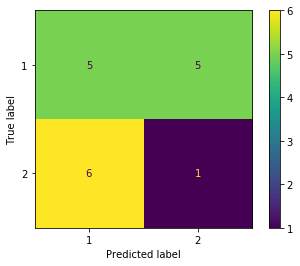

In [169]:
clsf = svm.SVC(kernel="sigmoid", C=2)   ## C=3 gave higher values of accuracy!
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)


from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(str(confusion_matrix(testset_Y, y_pred)))
plot_confusion_matrix(clsf, testset_X, testset_Y)

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
grid_params = {
    'kernel': ['sigmoid', 'poly', 'linear', 'rbf'],
    'C': [1, 2, 3, 4]
    
    
    
}

gs_svc = GridSearchCV(svm.SVC(),
        grid_params,
        scoring='accuracy',
        cv=5
        )

gs_results = gs_svc.fit(trainset_X, trainset_Y)

In [172]:
gs_svc.best_estimator_

SVC(C=4, kernel='sigmoid')

In [173]:
gs_svc.best_score_

0.7321428571428571

In [209]:
from sklearn.svm import LinearSVC
clsf_ls = LinearSVC(dual=False, random_state=0, penalty="l1", max_iter=10000)
clsf_ls.fit(trainset_X, trainset_Y)

y_pred = clsf_ls.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.5294117647058824
Precision 0.6666666666666666
Recall 0.4


### Running Logistic Regression on ABIDE 2 dataset

Accuracy 0.29411764705882354
Precision 0.4
Recall 0.4
[[4 6]
 [6 1]]


/home/titir/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


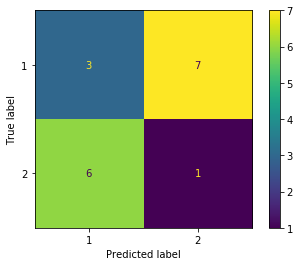

In [211]:
from sklearn.linear_model import LogisticRegression

clsf_lg = LogisticRegression(penalty='l2')
clsf_lg.fit(trainset_X, trainset_Y)

y_pred = clsf_lg.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)


from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(str(confusion_matrix(testset_Y, y_pred)))
plot_confusion_matrix(clsf, testset_X, testset_Y)

In [176]:
import matplotlib.pyplot as plt
import seaborn as sn


### Running a Random Forest Classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier 
# TODO
clsf_rf = RandomForestClassifier()
clsf_rf.fit(trainset_X, trainset_Y)

y_pred = clsf_rf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.35294117647058826
Precision 0.4444444444444444
Recall 0.4


In [178]:
grid_params_rf = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'n_estimators': [80, 90, 100, 110]
    
}

gs_rf = GridSearchCV(RandomForestClassifier(),
                        grid_params_rf,
                        scoring='accuracy')

gs_results_rf = gs_rf.fit(trainset_X, trainset_Y)
gs_rf.best_estimator_

RandomForestClassifier(max_depth=110, n_estimators=110)

In [179]:
gs_rf.best_score_

0.6571428571428571

In [208]:
from sklearn.tree import DecisionTreeClassifier 

clsf_dt = DecisionTreeClassifier() 
clsf_dt.fit(trainset_X, trainset_Y)

y_pred = clsf_dt.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.35294117647058826
Precision 0.42857142857142855
Recall 0.3


### Naive Bayes

Accuracy 0.47058823529411764
Precision 0.5714285714285714
Recall 0.4


/home/titir/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


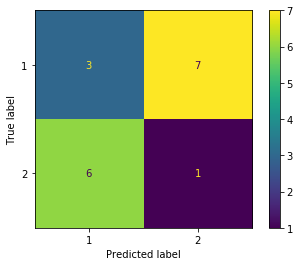

In [207]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
clsf_nb = GaussianNB() ## gives best accuracy of all the different naive bayes approaches
clsf_nb.fit(trainset_X, trainset_Y)

y_pred = clsf_nb.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

plot_confusion_matrix(clsf, testset_X, testset_Y)

### KNN

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

k = int(sqrt(len(trainset_X)))
clsf = KNeighborsClassifier(n_neighbors=14) 
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.35294117647058826
Precision 0.3333333333333333
Recall 0.1


Accuracy 0.23529411764705882
Precision 0.3333333333333333
Recall 0.3
[[3 7]
 [6 1]]


/home/titir/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


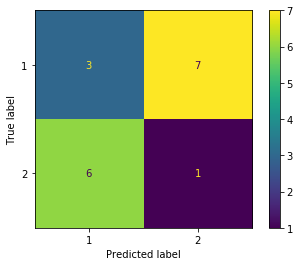

In [183]:
from sklearn.linear_model import LogisticRegression

clsf = LogisticRegression(penalty='none')
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)


from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(str(confusion_matrix(testset_Y, y_pred)))
plot_confusion_matrix(clsf, testset_X, testset_Y)

### Trying a grid search with KNN 

In [184]:
from sklearn.model_selection import GridSearchCV

k = [i for i in range(1, 15, 2)]
grid_params_knn = {
    'n_neighbors': k,
    'weights': ['uniform', 'distance'] ,
    'metric': ['minkowski', 'manhattan'] 
}

gs_knn = GridSearchCV(KNeighborsClassifier(),
        grid_params_knn,
        scoring='accuracy',
        )

gs_results_knn = gs_knn.fit(trainset_X, trainset_Y)

In [185]:
gs_knn.best_score_


0.6285714285714284

In [186]:
gs_knn.best_estimator_

KNeighborsClassifier(metric='manhattan')

In [187]:
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

### MLP Classifier

In [188]:
from sklearn.neural_network import MLPClassifier, MLPRegressor, BernoulliRBM

clsf_mlp = MLPClassifier(learning_rate='adaptive', max_iter=10000)
clsf_mlp.fit(trainset_X, trainset_Y)

y_pred = clsf_mlp.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.23529411764705882
Precision 0.3333333333333333
Recall 0.3


In [189]:
grid_params_mlp = {
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'], 
    'max_iter': [500, 1000, 10000],
    'early_stopping': [True]
    
    
    
}

gs_mlp = GridSearchCV(MLPClassifier(),
        grid_params_mlp,
        scoring='accuracy',
        )

gs_results_mlp = gs_mlp.fit(trainset_X, trainset_Y)

In [190]:
gs_mlp.best_estimator_

MLPClassifier(activation='tanh', early_stopping=True, max_iter=10000)

In [191]:
gs_mlp.best_score_

0.7071428571428571

### Classifiers we have right now 
* MLP
* Random Forests
* Naive Bayes
* KNN
* SVC
* Linear SVC


In [192]:
classifiers = [
gs_svc.best_estimator_,
gs_knn.best_estimator_,
gs_mlp.best_estimator_]



In [193]:

def find_mode_classifier_result(newX):
    X_features_nn = []
    X_mode = []
    
    for x in newX:
        if (len(x) == 2016):
            nv = []
            for clsf in classifiers:
                nv.append(clsf.predict([x]))

            X_features_nn.append(nv)
            #print(type(nv))
            nv_list = list(nv)
            val = max(nv_list, key=nv_list.count)
            X_mode.append(val)
    return (X_features_nn, X_mode)

In [196]:
(X_features_nn, y_pred_mode) = find_mode_classifier_result(trainset_X)

#### Accuracy from calculating the mode of the result of all the classifiers

In [197]:
metrics.accuracy_score(trainset_Y, y_pred_mode)

0.8421052631578947

In [198]:
len(X_features_nn[0])

3

### Addding a Neural Network

In [199]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, LeakyReLU
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
def build_model():
    model = Sequential()
    model.add(Dense(32, input_dim=3, activation='tanh'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    
    return model
    

In [201]:
model = build_model()
epochs = 100

In [202]:
from sklearn.preprocessing import normalize
X_train = np.array(X_features_nn)
Y_train = np.array(trainset_Y)

In [203]:
model.fit(X_train, Y_train, epochs=epochs)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 0.6833 - accuracy: 0.3421
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.5820 - accuracy: 0.3421
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3129 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1501 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: -0.0054 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: -0.0780 - accuracy: 0.5000
Epoch 11/100
2/2 [=========

In [204]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, OPTICS

cl = KMeans(n_clusters=2).fit(newX)
cl.labels_
ypred = cl.labels_ + 1
ypred
metrics.accuracy_score(newY, ypred)

0.38181818181818183